In [5]:
import numpy as np
import pandas as pd
df =  pd.read_csv('spam.csv',encoding='latin1')

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5425,ham,Otherwise had part time job na-tuition..,NaN,NaN,NaN
4951,spam,"Welcome to Select, an O2 service with added be...",NaN,NaN,NaN
325,ham,No calls..messages..missed calls,NaN,NaN,NaN
5536,ham,Aiyah ok wat as long as got improve can alread...,NaN,NaN,NaN
2389,ham,Boo. How's things? I'm back at home and a litt...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
#data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [30]:
df.rename(columns = {'v1':'Result','v2':'Input'},inplace = True)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Result'] = encoder.fit_transform(df['Result'])
df.sample(5)

,Result,Input
536,0,"Probably gonna be here for a while, see you la..."
1506,1,Thanks for the Vote. Now sing along with the s...
80,0,"Sorry, I'll call later"
507,0,You should know now. So how's anthony. Are you...
4314,0,Captain is in our room:)


In [32]:
df.isna().sum()

Result    0
Input     0
dtype: int64

In [35]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()
df.shape

(5169, 2)

In [36]:
#EDA
df['Result'].value_counts()

Result
0    4516
1     653
Name: count, dtype: int64

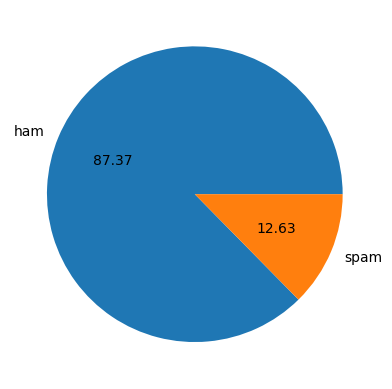

In [39]:
import matplotlib.pyplot as plt
plt.pie(df['Result'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [41]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 2.8 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.8 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.6 MB/s eta 0:00:00


In [55]:
#baisedness in data
import nltk

In [56]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\debas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [63]:
print(nltk.data.path)

['C:\\Users\\debas/nltk_data', 'C:\\Users\\debas\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data', 'C:\\Users\\debas\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data', 'C:\\Users\\debas\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data', 'C:\\Users\\debas\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [64]:
#number of character
df['characters'] = df['Input'].apply(len)

In [65]:
df.sample(3)

,Result,Input,characters
3461,1,Bloomberg -Message center +447797706009 Why wa...,101
730,1,Email AlertFrom: Jeri StewartSize: 2KBSubject:...,101
3848,0,U in town alone?,16


In [67]:
#no of worlds
from nltk.tokenize import word_tokenize
df['words'] = df['Input'].apply(lambda x:len(nltk.word_tokenize(x)))

In [70]:
df.head()

,Result,Input,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [69]:
df['sentences'] = df['Input'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [75]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [80]:
df[df['Result'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [81]:
df[df['Result'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

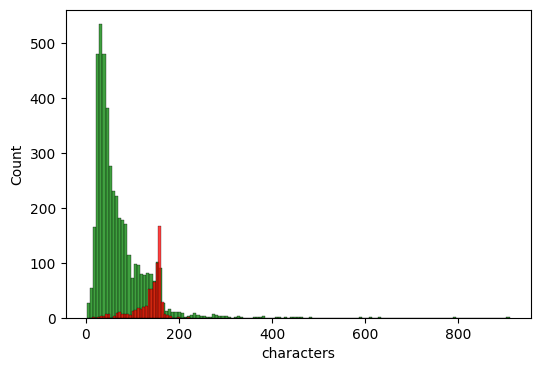

In [96]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df[df['Result'] == 0]['characters'],color='green')
sns.histplot(df[df['Result'] == 1]['characters'],color = "red")

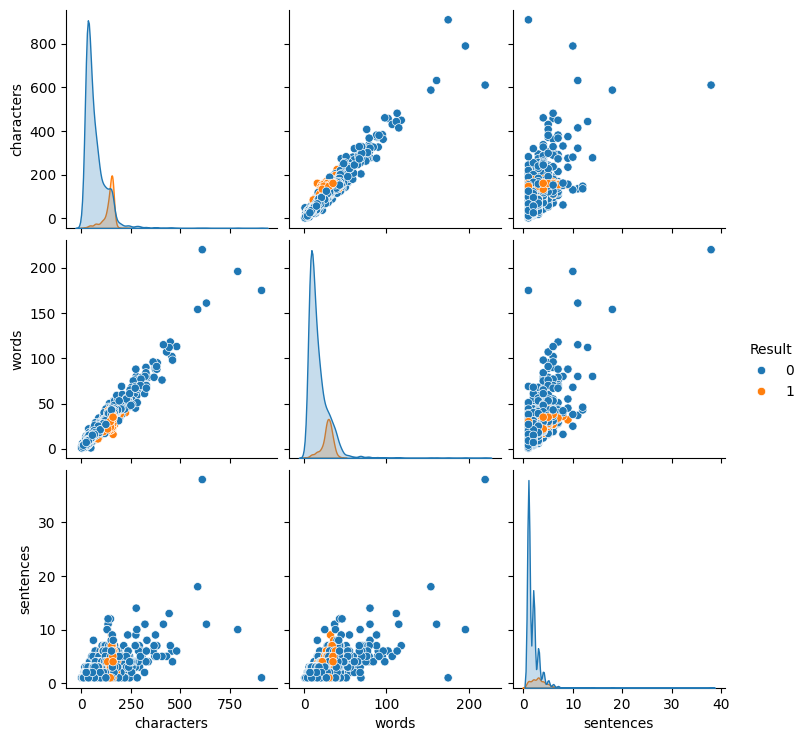

In [97]:
sns.pairplot(df,hue='Result')

<Axes: >

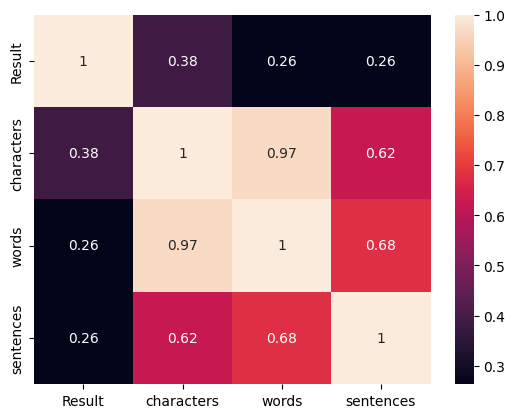

In [104]:
sns.heatmap(df.iloc[:,[0,2,3,4]].corr(),annot = True)

In [115]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [122]:
#text preprocessing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    out_put = []
    for i in text:
        if i.isalnum():
            out_put.append(i)
            
    text = out_put[:]
    out_put.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            out_put.append(i)
            
    text = out_put[:]
    out_put.clear()

    ps = PorterStemmer()

    for i in text:
        out_put.append(ps.stem(i))
            
    return " ".join(out_put)

In [124]:
df['Input'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Input, Length: 5169, dtype: object

In [125]:
df['transform_text'] = df['Input'].apply(transform_text)

In [126]:
df.head()

,Result,Input,characters,words,sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [148]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size=5,background_color ='black')

In [149]:
spam_wc = wc.generate(df[df['Result'] == 1]['transform_text'].str.cat(sep = ""))

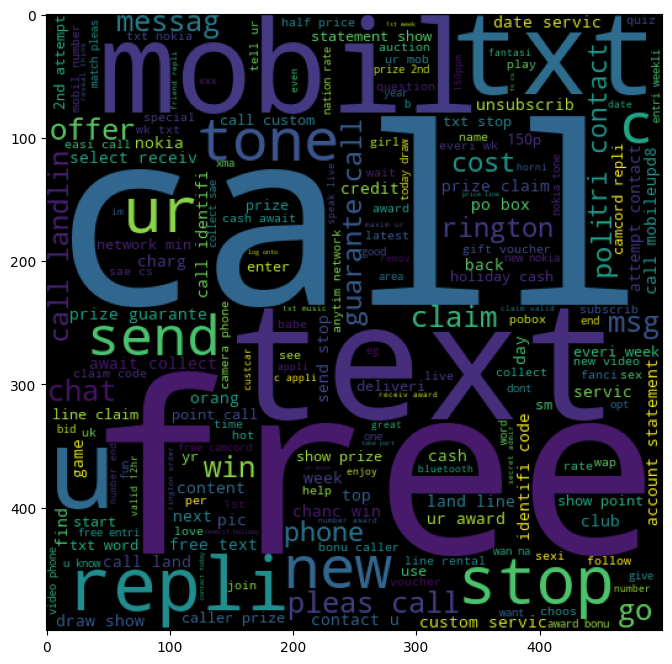

In [150]:
plt.figure(figsize = (8,8))
plt.imshow(spam_wc)

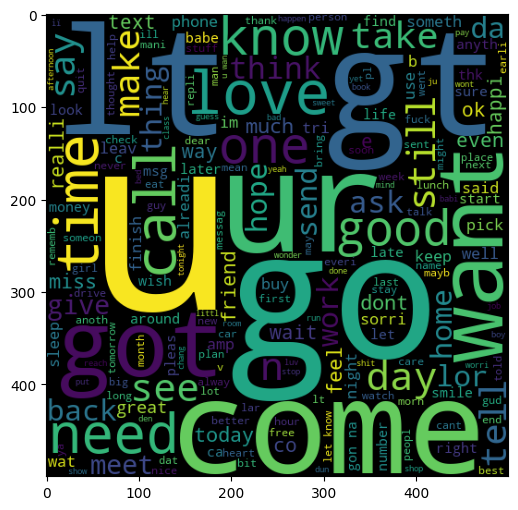

In [151]:
ham_wc = wc.generate(df[df['Result'] == 0]['transform_text'].str.cat(sep = ""))
plt.figure(figsize = (6,6))
plt.imshow(ham_wc)

In [152]:
spam = []
for msg in df[df['Result'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam.append(word)


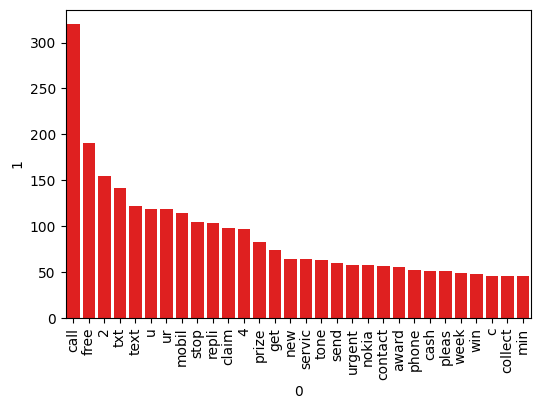

In [170]:
from collections import Counter
df_imp_words = pd.DataFrame(Counter(spam).most_common(30))
plt.figure(figsize=(6,4))
sns.barplot(x = df_imp_words[0],y = df_imp_words[1],color='red')
plt.xticks(rotation='vertical')
plt.show()


In [171]:
ham = []
for msg in df[df['Result'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham.append(word)


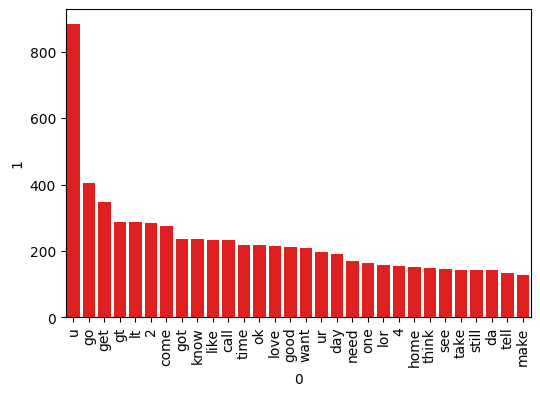

In [173]:
from collections import Counter
df_imp_words_ham = pd.DataFrame(Counter(ham).most_common(30))
plt.figure(figsize=(6,4))
sns.barplot(x = df_imp_words_ham[0],y = df_imp_words_ham[1],color='red')
plt.xticks(rotation='vertical')
plt.show()

In [174]:
#model building
df.head(3)

,Result,Input,characters,words,sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [234]:
#words -> vectorize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [235]:
x = tfidf.fit_transform(df['transform_text']).toarray()

In [236]:
x.shape

(5169, 3000)

In [237]:
y = df['Result'].values

In [238]:
y.shape

(5169,)

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [241]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [242]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [243]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print("GAUSSIAN NAIVE BAYES")
print("*"*50)
print("accuracy score:\n",accuracy_score(y_test,y_pred1))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred1))
print("precision score:\n",precision_score(y_test,y_pred1))

GAUSSIAN NAIVE BAYES
**************************************************
accuracy score:
 0.8733075435203095
confusion matrix:
 [[790 106]
 [ 25 113]]
precision score:
 0.5159817351598174


In [244]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print("MULTINOMIAIL NAIVE BAYES")
print("*"*50)
print("accuracy score:\n",accuracy_score(y_test,y_pred2))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred2))
print("precision score:\n",precision_score(y_test,y_pred2))

MULTINOMIAIL NAIVE BAYES
**************************************************
accuracy score:
 0.9709864603481625
confusion matrix:
 [[896   0]
 [ 30 108]]
precision score:
 1.0


In [245]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("BERNOULLI NAIVE BAYES")
print("*"*50)
print("accuracy score:\n",accuracy_score(y_test,y_pred3))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred3))
print("precision score:\n",precision_score(y_test,y_pred3))

BERNOULLI NAIVE BAYES
**************************************************
accuracy score:
 0.9835589941972921
confusion matrix:
 [[895   1]
 [ 16 122]]
precision score:
 0.991869918699187


In [246]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))